In [1]:
def diversity_gradient(dfdw_train, dfdw_val, mylambda, sigma_p):
    """
    This is the gradient of the diversity term.

    Parameters
    ----------
    dfdw_train: float
        the gradient of the output of a neural network, with respect to a single weight, given a training sample.
    dfdw_val: float
        the gradient of the output of a neural network, with respect to a single weight, given a validation sample.
    mylambda: float
        the temperature parameter when estimating a posterior
    sigma_p: float
        the prior variance

    Returns
    -------
    grad: float
        the diversity gradient.
    """
    term1 = -(mylambda*dfdw_train**2+1/sigma_p)**(-2)*(2*mylambda*dfdw_train**3)*dfdw_val**2
    term2 = (mylambda*dfdw_train**2+1/sigma_p)**(-1)*2*dfdw_val**3
    grad = term1+term2
    return grad


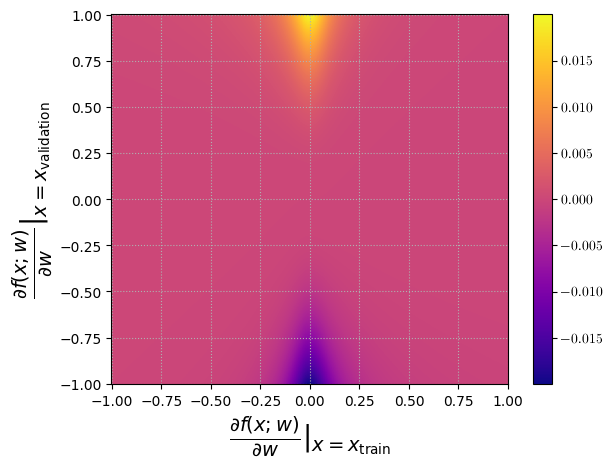

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm

dfdw_train = np.linspace(-1,1,1000)
dfdw_val = np.linspace(-1,1,1000)
mylambda = 10000
sigma_p = 0.01
xx, yy = np.meshgrid(dfdw_train, dfdw_val)
zz = diversity_gradient(xx, yy, mylambda=mylambda,sigma_p=sigma_p)
labelsize = 20


fig, ax = plt.subplots()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
im = ax.pcolormesh(dfdw_train,dfdw_val,zz,cmap='plasma')
plt.xlabel(r'$\frac{\partial f(x;w)}{\partial w}|_{x=x_\mathrm{train}}$', fontsize=labelsize)
plt.ylabel(r'$\frac{\partial f(x;w)}{\partial w}|_{x=x_\mathrm{validation}}$', fontsize=labelsize)
plt.grid(linestyle=':')
plt.colorbar(im)


This plot has a nice interpretation. For a given weight, the diversity term is non-zero if the validation gradient is non-zero and the training gradient is close to zero.